# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset
from scDML.utils import ari # sklearn bug,not using sklearn.cluster.metrics

####################################################
dataset="heart"
ncelltype=14
####################################################
read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"
os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")

# scDML(reassign)

In [2]:
method="scDML"
# scDML_script.py have been calculate umap!!!!
if(os.path.exists(save_dir+method+"/leiden_6.0/"+dataset+"_"+method+"_leiden_6.0_(reassign)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","cluster_celltype"])        
    scDML_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
    print(scDML_reassign)
else:
    args_integrated=save_dir+method+"/leiden_6.0/"+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    from sklearn.metrics.cluster import normalized_mutual_info_score
    ARI= ari(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    print("ARI={}".format(ARI))
    print("NMI={}".format(NMI))
    results = {
    'ARI': np.round(ARI,3),
    'NMI': np.round(NMI,3),
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
    scDML_reassign.columns=[method+"(reassign)"]
    scDML_reassign.to_csv(save_dir+method+"/leiden_6.0/"+dataset+"_"+method+"_leiden_6.0_(reassign)_evaluation.csv")
    #scDML_reassign

AnnData object with n_obs × n_vars = 269794 × 1000
    obs: 'orig.ident', 'tech', 'condition', 'Sex', 'id', 'Names', 'CondTech', 'BATCH', 'celltype', 'batch', 'init_cluster', 'reassign_cluster', 'cluster_celltype'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-10', 'std-10', 'mean-11', 'std-11', 'mean-12', 'std-12', 'mean-13', 'std-13', 'mean-14', 'std-14', 'mean-15', 'std-15', 'mean-16', 'std-16', 'mean-17', 'std-17', 'mean-18', 'std-18', 'mean-19', 'std-19', 'mean-2', 'std-2', 'mean-20', 'std-20', 'mean-21', 'std-21', 'mean-22', 'std-22', 'mean-23', 'std-23', 'mean-24', 'std-24', 'mean-25', 'std-25', 'mean-26', 'std-26', 'mean-27', 'std-27', 'mean-28', 'std-28', 'mean-29', 'std-29', 'mean-3', 'std-3', 'mean-30', 'std-30', 'mean-31', 'std-31', 'mean-32', 'std-32', 'mean-33', 'std-33', 'mean-34', 'std-34', 'mean-35', 'std-35', 'mean-36', 'std-36', 'mean-37', 'std-37', 'mean-38', 'std-38', 'mean-39', 'std-39', 

# scDML(louvain)

...................................................................................................
..........................................method=scDML.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.732421875):n_cluster=14
ARI: 0.9753812244018989
NMI: 0.9586743325040046
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.276583

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 6.9262147458524295
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.7957409024238586
ASW_label/batch= 0.8934920100295185
....................................... calculate all metric done .................................


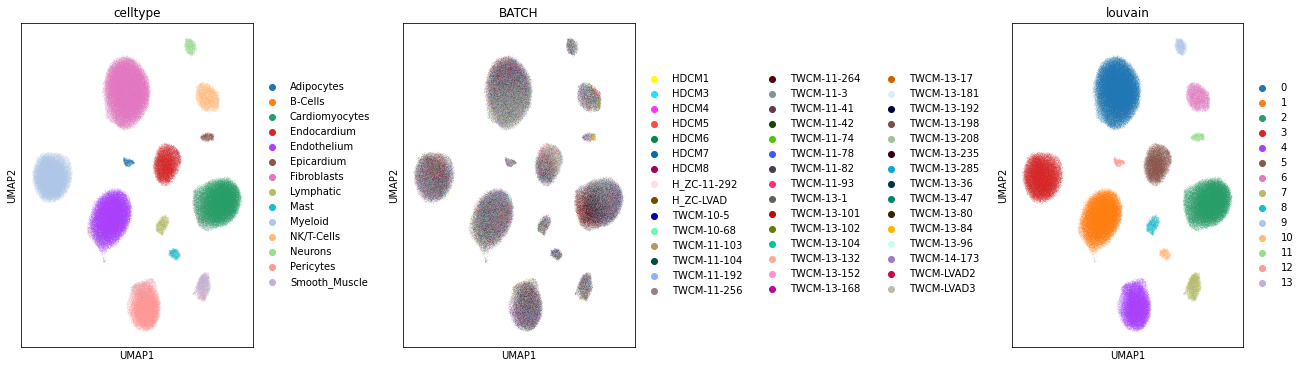

                 scDML(louvain)
ARI                       0.975
NMI                       0.959
ASW_label                 0.796
ASW_label/batch           0.893
BatchKL                   1.277
cLISI                     1.000
iLISI                     6.926


In [3]:
method="scDML"
if(os.path.exists(save_dir+method+"/leiden_6.0/"+"/"+dataset+"_"+method+"_leiden_6.0_(louvain)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scDML3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
    print(scDML3_eva)
else:
    args_integrated=save_dir+method+"/leiden_6.0/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)

    adata_scDML=sc.AnnData(adata_integrated.obsm["X_emb"])
    adata_scDML.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scDML.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(save_dir+method+"/leiden_6.0/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scDML3_eva.columns=[method+"(louvain)"] ## modify column names
    scDML3_eva.to_csv(save_dir+method+"/leiden_6.0/"+dataset+"_"+method+"_leiden_6.0_(louvain)_evaluation.csv")
    print(scDML3_eva)

    adata_integrated.write_h5ad(save_dir+method+"/leiden_6.0/"+dataset+"_"+method+"_evaluated.h5ad")